In [2]:
# !pip install xclim 

In [3]:
%matplotlib inline 
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os 
import gcsfs 
from matplotlib import cm
import warnings 

from science_validation_manual import *

In [4]:
import dask
import dask.array as da
import dask.distributed as dd
import rhg_compute_tools.kubernetes as rhgk

/srv/conda/envs/notebook/lib/python3.8/site-packages/dask_gateway/client.py:21: FutureWarning: format_bytes is deprecated and will be removed in a future release. Please use dask.utils.format_bytes instead.
  from distributed.utils import LoopRunner, format_bytes


In [5]:
client, cluster = rhgk.get_standard_cluster()

In [6]:
cluster

In [8]:
pr_ref = read_gcs_zarr('gs://scratch-170cd6ec/d724b589-aa9a-4018-a086-f254140a4d61/e2e-miroc6-pr-dev-42n5b-1192156886/rechunked.zarr')

bc_ssp370 = read_gcs_zarr('gs://biascorrected-492e989a/stage/ScenarioMIP/MIROC/MIROC6/ssp370/r1i1p1f1/day/pr/gn/v20220120010323.zarr')

bc_hist = read_gcs_zarr('gs://biascorrected-492e989a/stage/CMIP/MIROC/MIROC6/historical/r1i1p1f1/day/pr/gn/v20220120010323.zarr')

cmip6_hist = read_gcs_zarr('gs://scratch-170cd6ec/d724b589-aa9a-4018-a086-f254140a4d61/e2e-miroc6-pr-dev-42n5b-1959744193/rechunked.zarr')

cmip6_ssp370 = read_gcs_zarr('gs://scratch-170cd6ec/d724b589-aa9a-4018-a086-f254140a4d61/e2e-miroc6-pr-dev-42n5b-3827161898/rechunked.zarr')

In [9]:
ds_hist = read_gcs_zarr('gs://downscaled-288ec5ac/stage/CMIP/MIROC/MIROC6/historical/r1i1p1f1/day/pr/gn/v20220120010323.zarr')

ds_ssp370 = read_gcs_zarr('gs://downscaled-288ec5ac/stage/ScenarioMIP/MIROC/MIROC6/ssp370/r1i1p1f1/day/pr/gn/v20220120010323.zarr')

In [10]:
ref_season = pr_ref['pr'].sel(time=slice("1995", "2014")).groupby('time.season').sum('time').load()
cmip6_season = cmip6_hist['pr'].sel(time=slice("1995", "2014")).groupby('time.season').sum('time').load()
bc_season = bc_hist['pr'].sel(time=slice("1995", "2014")).groupby('time.season').sum('time').load()

In [11]:
ref_season_max = pr_ref['pr'].sel(time=slice("1995", "2014")).groupby('time.season').max('time').load()
cmip6_season_max = cmip6_hist['pr'].sel(time=slice("1995", "2014")).groupby('time.season').max('time').load()
bc_season_max = bc_hist['pr'].sel(time=slice("1995", "2014")).groupby('time.season').max('time').load()

In [12]:
cmip6_ssp370_season_max = cmip6_ssp370['pr'].sel(time=slice("2080", "2100")).groupby('time.season').max('time').load()
# bc_ssp126_season_max = bc_ssp126['pr'].sel(time=slice("2080", "2100")).groupby('time.season').max('time').load()
bc_ssp370_season_max = bc_ssp370['pr'].sel(time=slice("2080", "2100")).groupby('time.season').max('time').load()

In [13]:
'''ref_season_ts = pr_ref['pr'].sel(time=slice("1995", "2014")).resample(time="QS-DEC").sum().load()
cmip6_season_ts = cmip6_hist['pr'].sel(time=slice("1995", "2014")).resample(time="QS-DEC").sum().load()
bc_season_ts = bc_hist['pr'].sel(time=slice("1995", "2014")).resample(time="QS-DEC").sum().load()'''

'ref_season_ts = pr_ref[\'pr\'].sel(time=slice("1995", "2014")).resample(time="QS-DEC").sum().load()\ncmip6_season_ts = cmip6_hist[\'pr\'].sel(time=slice("1995", "2014")).resample(time="QS-DEC").sum().load()\nbc_season_ts = bc_hist[\'pr\'].sel(time=slice("1995", "2014")).resample(time="QS-DEC").sum().load()'

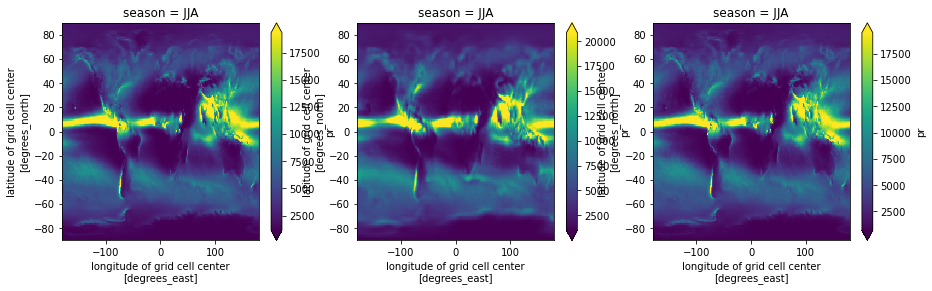

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

ref_season.sel(season='JJA').plot(ax=axes[0], robust=True)
cmip6_season.sel(season='JJA').plot(ax=axes[1], robust=True)
bc_season.sel(season='JJA').plot(ax=axes[2], robust=True)

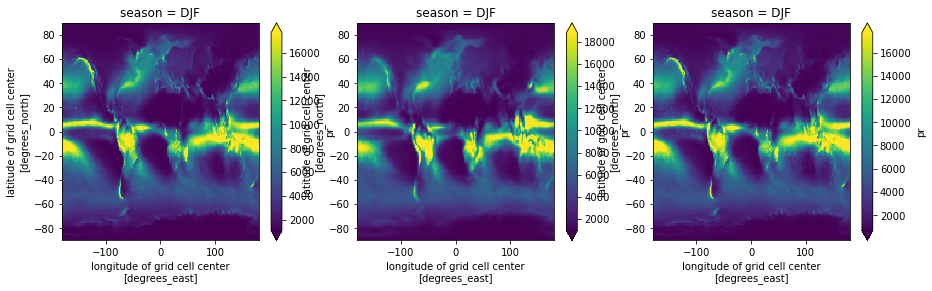

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

season = 'DJF'
ref_season.sel(season=season).plot(ax=axes[0], robust=True)
cmip6_season.sel(season=season).plot(ax=axes[1], robust=True)
bc_season.sel(season=season).plot(ax=axes[2], robust=True)

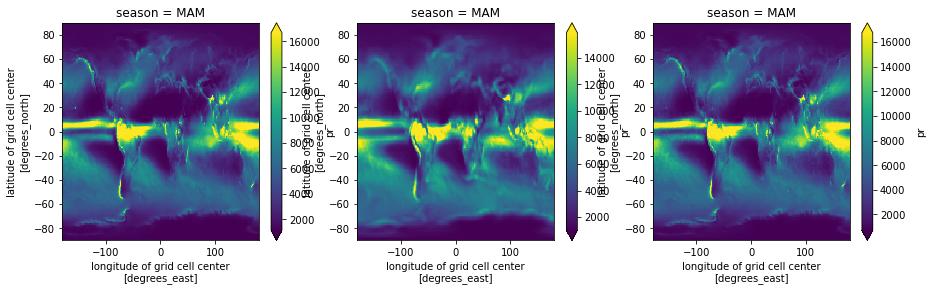

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

season = 'MAM'
ref_season.sel(season=season).plot(ax=axes[0], robust=True)
cmip6_season.sel(season=season).plot(ax=axes[1], robust=True)
bc_season.sel(season=season).plot(ax=axes[2], robust=True)

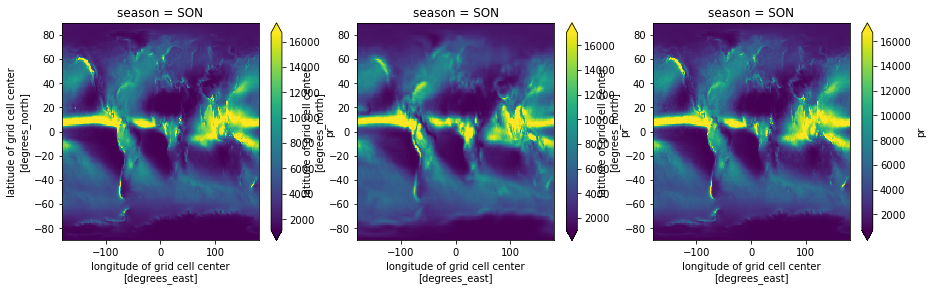

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

season = 'SON'
ref_season.sel(season=season).plot(ax=axes[0], robust=True)
cmip6_season.sel(season=season).plot(ax=axes[1], robust=True)
bc_season.sel(season=season).plot(ax=axes[2], robust=True)

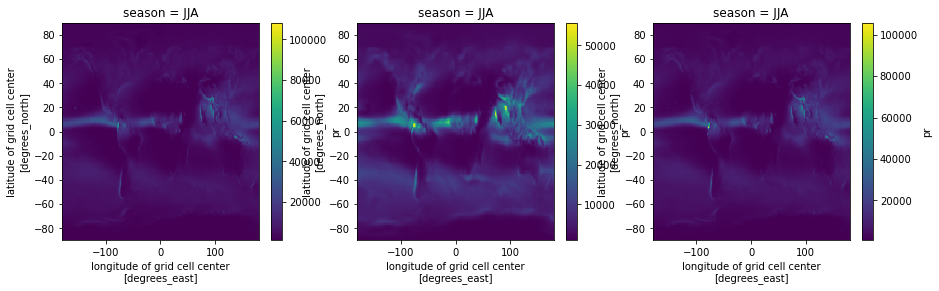

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
season = 'JJA'
ref_season.sel(season=season).plot(ax=axes[0])
cmip6_season.sel(season=season).plot(ax=axes[1])
bc_season.sel(season=season).plot(ax=axes[2])

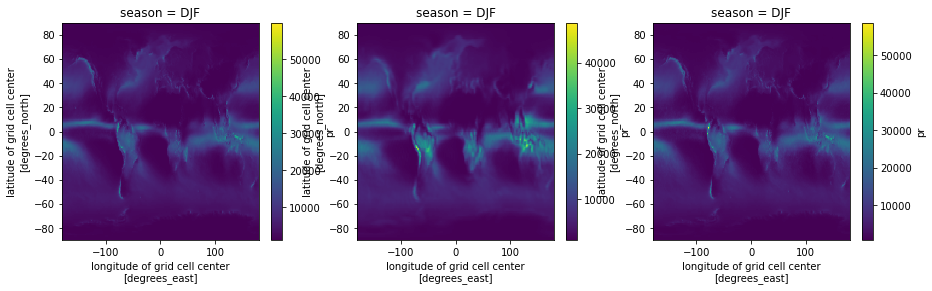

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
season = 'DJF'
ref_season.sel(season=season).plot(ax=axes[0])
cmip6_season.sel(season=season).plot(ax=axes[1])
bc_season.sel(season=season).plot(ax=axes[2])

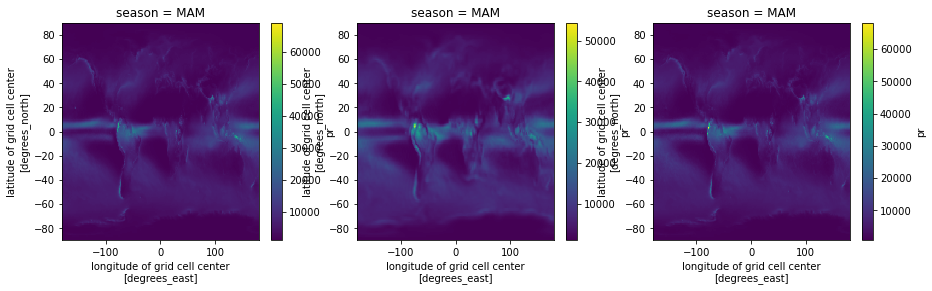

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
season = 'MAM'
ref_season.sel(season=season).plot(ax=axes[0])
cmip6_season.sel(season=season).plot(ax=axes[1])
bc_season.sel(season=season).plot(ax=axes[2])

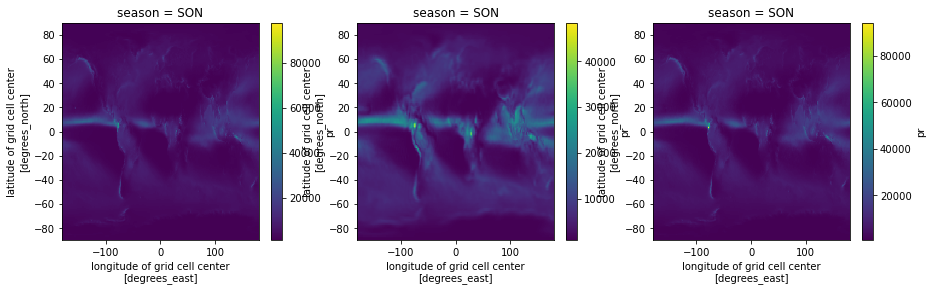

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
season = 'SON'
ref_season.sel(season=season).plot(ax=axes[0])
cmip6_season.sel(season=season).plot(ax=axes[1])
bc_season.sel(season=season).plot(ax=axes[2])

### how do the seasonal maxima compare? ### 

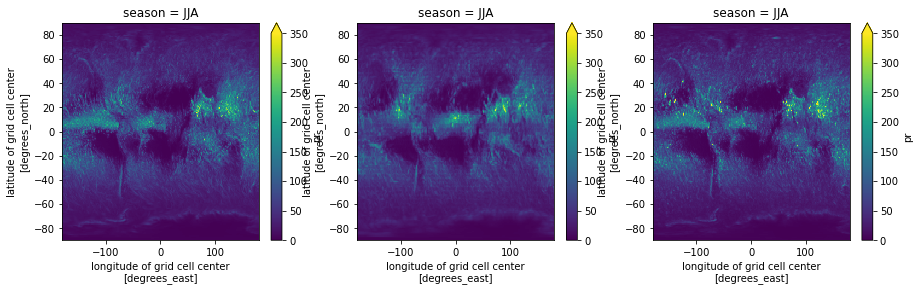

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
season = 'JJA'
vmax = 350
vmin = 0
ref_season_max.sel(season=season).plot(ax=axes[0], vmin=vmin, vmax=vmax)
cmip6_season_max.sel(season=season).plot(ax=axes[1], vmin=vmin, vmax=vmax)
bc_season_max.sel(season=season).plot(ax=axes[2], vmin=vmin, vmax=vmax)

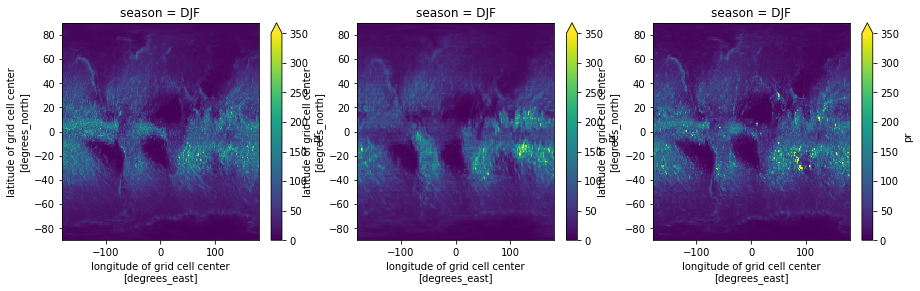

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
season = 'DJF'
vmax = 350
vmin = 0
ref_season_max.sel(season=season).plot(ax=axes[0], vmin=vmin, vmax=vmax)
cmip6_season_max.sel(season=season).plot(ax=axes[1], vmin=vmin, vmax=vmax)
bc_season_max.sel(season=season).plot(ax=axes[2], vmin=vmin, vmax=vmax)

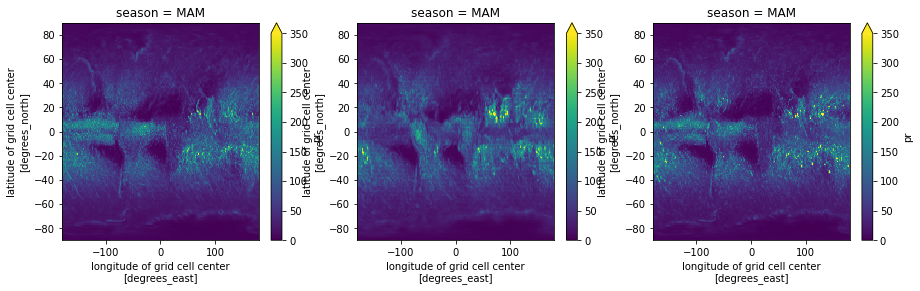

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
season = 'MAM'
vmax = 350
vmin = 0
ref_season_max.sel(season=season).plot(ax=axes[0], vmin=vmin, vmax=vmax)
cmip6_season_max.sel(season=season).plot(ax=axes[1], vmin=vmin, vmax=vmax)
bc_season_max.sel(season=season).plot(ax=axes[2], vmin=vmin, vmax=vmax)

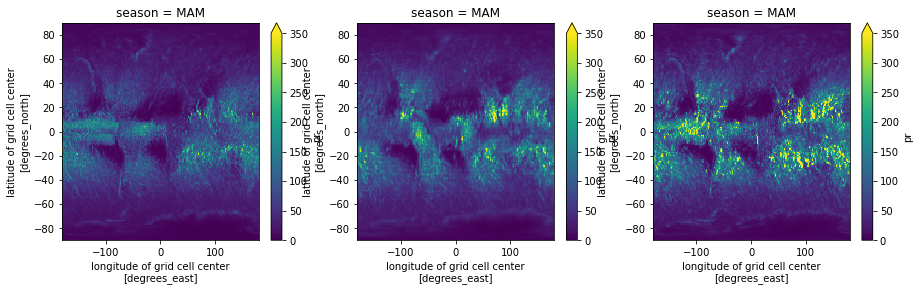

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
season = 'MAM'
vmax = 350
vmin = 0
ref_season_max.sel(season=season).plot(ax=axes[0], vmin=vmin, vmax=vmax)
cmip6_ssp370_season_max.sel(season=season).plot(ax=axes[1], vmin=vmin, vmax=vmax)
bc_ssp370_season_max.sel(season=season).plot(ax=axes[2], vmin=vmin, vmax=vmax)

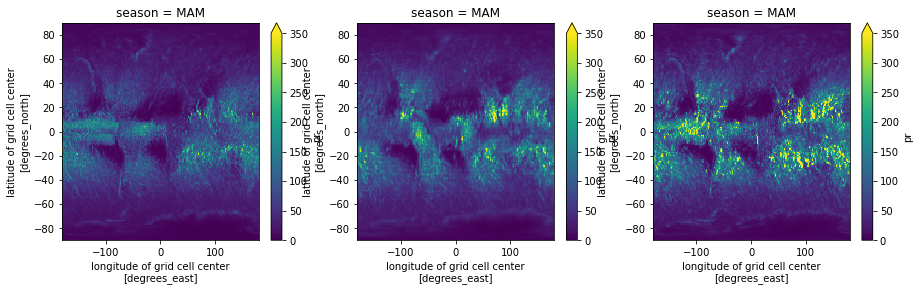

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
season = 'MAM'
vmax = 350
vmin = 0
ref_season_max.sel(season=season).plot(ax=axes[0], vmin=vmin, vmax=vmax)
cmip6_ssp370_season_max.sel(season=season).plot(ax=axes[1], vmin=vmin, vmax=vmax)
bc_ssp370_season_max.sel(season=season).plot(ax=axes[2], vmin=vmin, vmax=vmax)

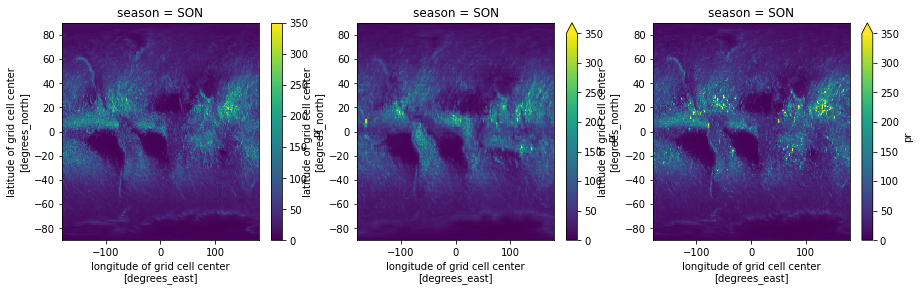

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
season = 'SON'
vmax = 350
vmin = 0
ref_season_max.sel(season=season).plot(ax=axes[0], vmin=vmin, vmax=vmax)
cmip6_season_max.sel(season=season).plot(ax=axes[1], vmin=vmin, vmax=vmax)
bc_season_max.sel(season=season).plot(ax=axes[2], vmin=vmin, vmax=vmax)

so for these gridcells with larger values for a season, does this greatly increase the sum? 

In [53]:
season = 'JJA'
bc_season_max.sel(season=season).where(bc_season_max.sel(season=season) > 900, drop=True)

<xarray.DataArray 'pr' (lat: 2, lon: 2)>
array([[      nan, 1189.6115],
       [1095.4928,       nan]], dtype=float32)
Coordinates:
  * lat      (lat) float64 23.5 30.5
  * lon      (lon) float64 -157.5 63.5
    season   <U3 'JJA'

In [54]:
lat = 23.5
lon = 63.5
print(ref_season_max.sel(season=season).sel(lat=lat, lon=lon).values)
print(cmip6_season_max.sel(season=season).sel(lat=lat, lon=lon).values)
print(bc_season_max.sel(season=season).sel(lat=lat, lon=lon).values)

99.877495
84.59885
1189.6115


In [30]:
pr_ref_gc = pr_ref['pr'].sel(lat=-18.5, lon=148.5).sel(time=slice('1995', '2014')).resample(time="QS-DEC").sum().load()
pr_cmip6_gc = cmip6_hist['pr'].sel(lat=-18.5, lon=148.5).sel(time=slice('1995', '2014')).resample(time="QS-DEC").sum().load()
pr_bc_gc = bc_hist['pr'].sel(lat=-18.5, lon=148.5).sel(time=slice('1995', '2014')).resample(time="QS-DEC").sum().load()

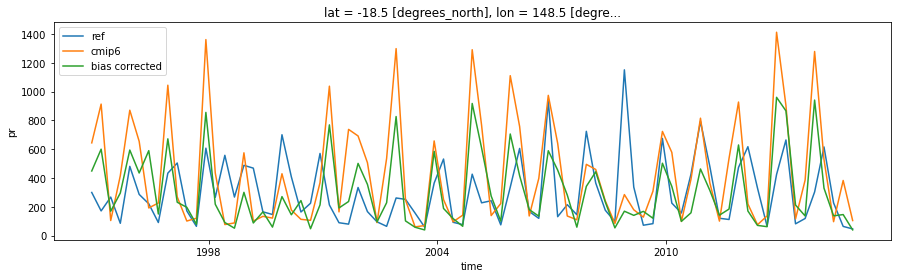

In [31]:
plt.figure(figsize=(15, 4))
pr_ref_gc.plot(label='ref')
pr_cmip6_gc.plot(label='cmip6')
pr_bc_gc.plot(label='bias corrected')
plt.legend()

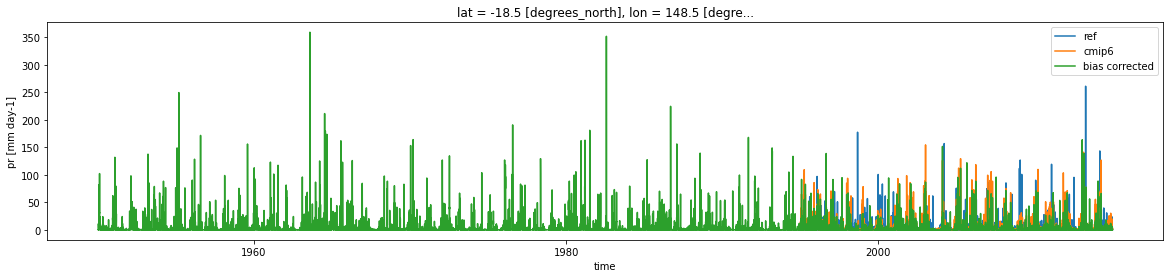

In [32]:
plt.figure(figsize=(20, 4))
lat = -18.5
lon = 148.5
pr_ref['pr'].sel(lat=lat, lon=lon).sel(time=slice('1995', '2014')).plot(label='ref')
cmip6_hist['pr'].sel(lat=lat, lon=lon).sel(time=slice('1995', '2014')).plot(label='cmip6')
bc_hist['pr'].sel(lat=lat, lon=lon).plot(label='bias corrected')
plt.legend()

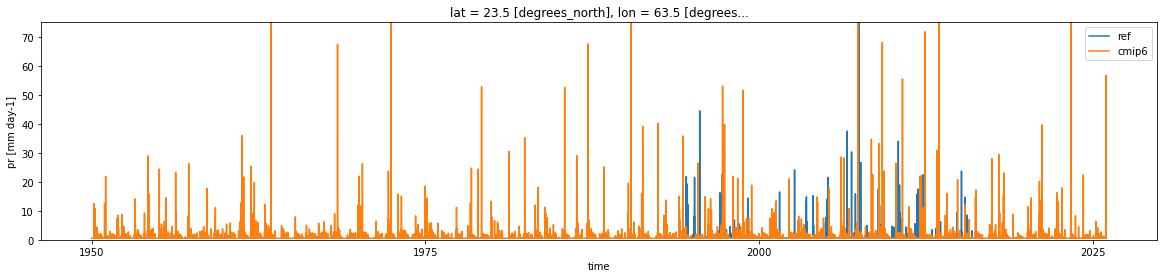

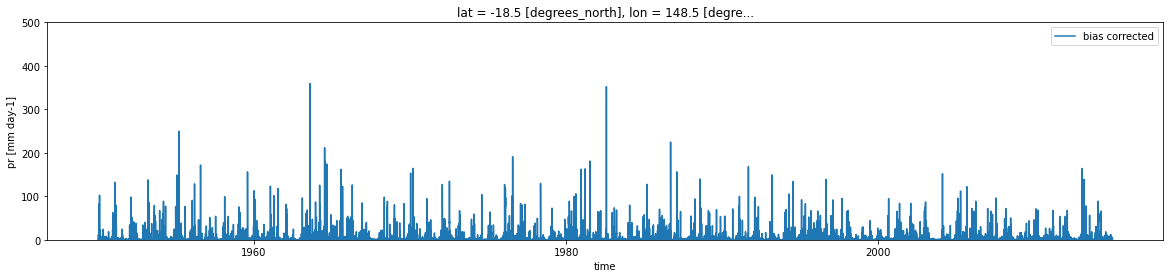

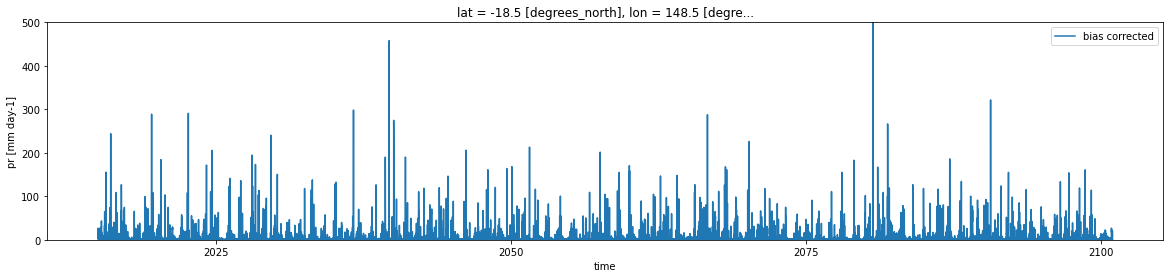

In [56]:
plt.figure(figsize=(20, 4))
lat = 23.5
lon = 63.5
pr_ref['pr'].sel(lat=lat, lon=lon).plot(label='ref')
cmip6_hist['pr'].sel(lat=lat, lon=lon).plot(label='cmip6')
# bc_hist['pr'].sel(lat=lat, lon=lon).sel(time=slice('2002', '2003')).plot(label='bias corrected')
plt.ylim([0, 75])
plt.legend()

plt.figure(figsize=(20, 4))
lat = -18.5
lon = 148.5
bc_hist['pr'].sel(lat=lat, lon=lon).plot(label='bias corrected')
plt.ylim([0, 500])
plt.legend()

plt.figure(figsize=(20, 4))
lat = -18.5
lon = 148.5
bc_ssp370['pr'].sel(lat=lat, lon=lon).plot(label='bias corrected')
plt.ylim([0, 500])
plt.legend()

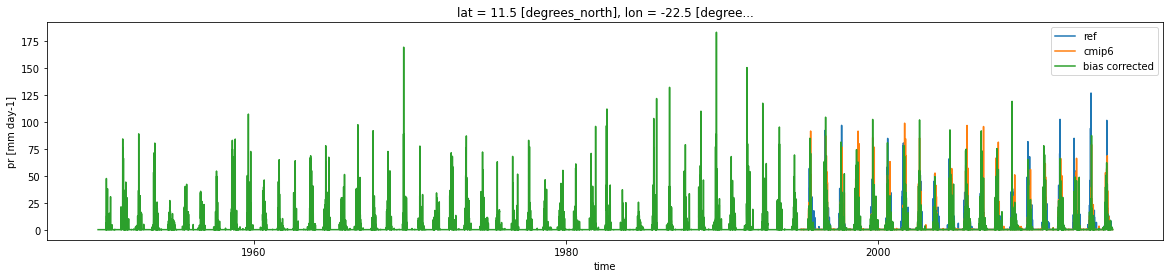

In [34]:
plt.figure(figsize=(20, 4))
lat = 11.5
lon = -22.5
pr_ref['pr'].sel(lat=lat, lon=lon).sel(time=slice('1995', '2014')).plot(label='ref')
cmip6_hist['pr'].sel(lat=lat, lon=lon).sel(time=slice('1995', '2014')).plot(label='cmip6')
bc_hist['pr'].sel(lat=lat, lon=lon).plot(label='bias corrected')
plt.legend()

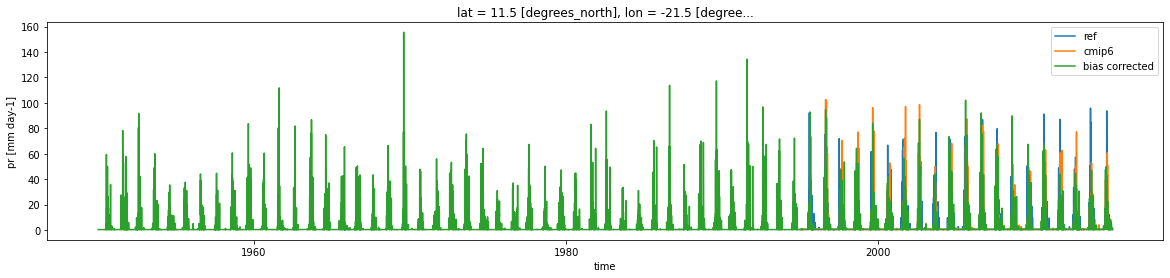

In [35]:
plt.figure(figsize=(20, 4))
lat = 11.5
lon = -21.5
pr_ref['pr'].sel(lat=lat, lon=lon).sel(time=slice('1995', '2014')).plot(label='ref')
cmip6_hist['pr'].sel(lat=lat, lon=lon).sel(time=slice('1995', '2014')).plot(label='cmip6')
bc_hist['pr'].sel(lat=lat, lon=lon).plot(label='bias corrected')
plt.legend()

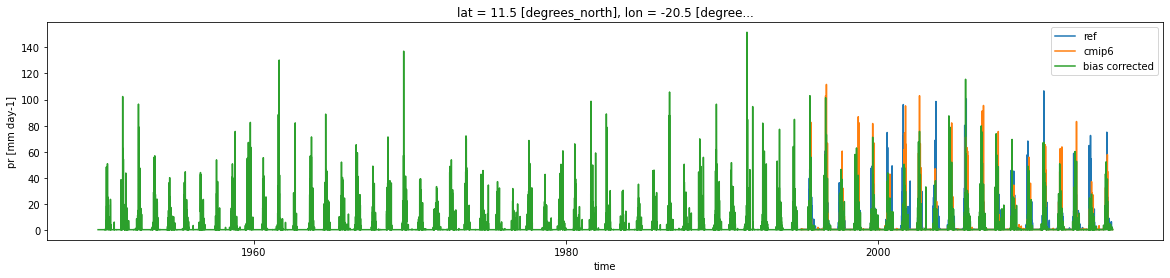

In [36]:
plt.figure(figsize=(20, 4))
lat = 11.5
lon = -20.5
pr_ref['pr'].sel(lat=lat, lon=lon).sel(time=slice('1995', '2014')).plot(label='ref')
cmip6_hist['pr'].sel(lat=lat, lon=lon).sel(time=slice('1995', '2014')).plot(label='cmip6')
bc_hist['pr'].sel(lat=lat, lon=lon).plot(label='bias corrected')
plt.legend()

### now look at some quantiles - those should look markedly better. Include downscaled data because of wet day freq correction.  ### 

In [37]:
qs = [0, 0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99, 1]

In [38]:
trend_cmip6 = cmip6_ssp370['pr'].quantile(q=qs, dim='time') - cmip6_hist['pr'].quantile(q=qs, dim='time')
trend_bc = (bc_ssp370['pr'].chunk(dict(time=-1)).quantile(q=qs, dim='time') -            bc_hist['pr'].chunk(dict(time=-1)).quantile(q=qs, dim='time'))

In [39]:
trend_ds = (ds_ssp370['pr'].chunk(dict(time=-1)).quantile(q=qs, dim='time') -            ds_hist['pr'].chunk(dict(time=-1)).quantile(q=qs, dim='time'))

In [40]:
trend_cmip6_comp = trend_cmip6.persist()
trend_bc_comp = trend_bc.persist()

In [41]:
trend_ds_comp = trend_ds.persist()

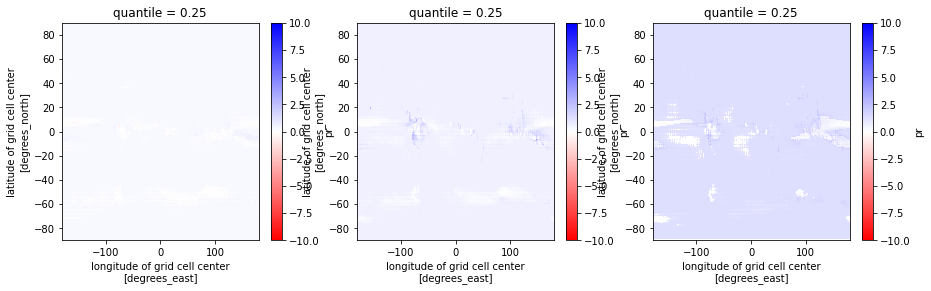

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
vmax = 10
vmin = -10
cmap = 'bwr_r'
q = 0.25
trend_cmip6_comp.sel(quantile=q).plot(ax=axes[0], vmin=vmin, vmax=vmax, cmap=cmap)
trend_bc_comp.sel(quantile=q).plot(ax=axes[1], vmin=vmin, vmax=vmax,cmap=cmap)
trend_ds_comp.sel(quantile=q).plot(ax=axes[2], vmin=vmin, vmax=vmax,cmap=cmap)

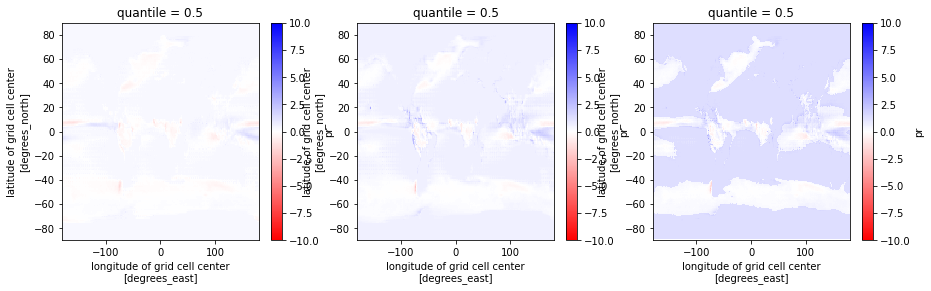

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
vmax = 10
vmin = -10
cmap = 'bwr_r'
q = 0.5
trend_cmip6_comp.sel(quantile=q).plot(ax=axes[0], vmin=vmin, vmax=vmax, cmap=cmap)
trend_bc_comp.sel(quantile=q).plot(ax=axes[1], vmin=vmin, vmax=vmax,cmap=cmap)
trend_ds_comp.sel(quantile=q).plot(ax=axes[2], vmin=vmin, vmax=vmax,cmap=cmap)

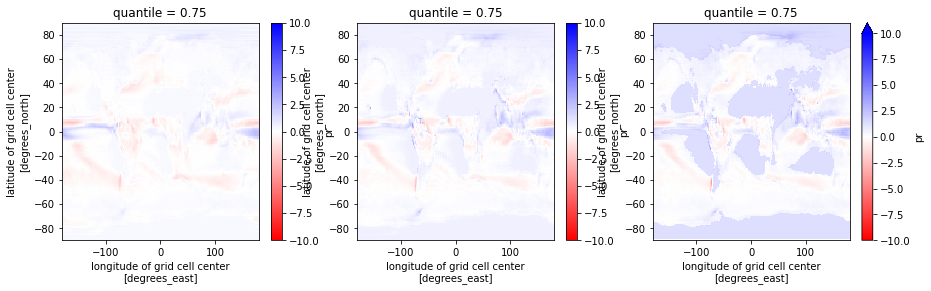

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
vmax = 10
vmin = -10
cmap = 'bwr_r'
q = 0.75
trend_cmip6_comp.sel(quantile=q).plot(ax=axes[0], vmin=vmin, vmax=vmax, cmap=cmap)
trend_bc_comp.sel(quantile=q).plot(ax=axes[1], vmin=vmin, vmax=vmax,cmap=cmap)
trend_ds_comp.sel(quantile=q).plot(ax=axes[2], vmin=vmin, vmax=vmax,cmap=cmap)

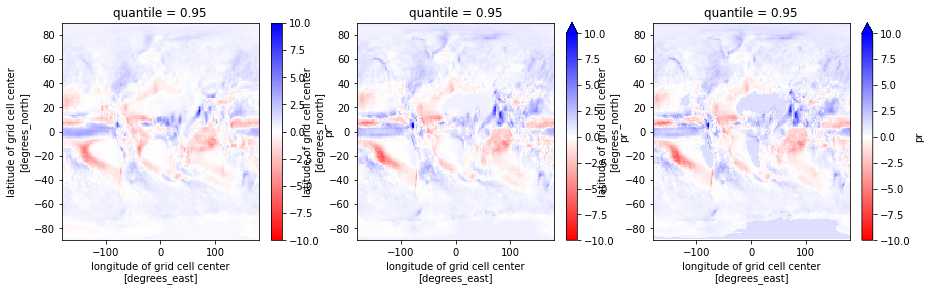

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
vmax = 10
vmin = -10
cmap = 'bwr_r'
q = 0.95
trend_cmip6_comp.sel(quantile=q).plot(ax=axes[0], vmin=vmin, vmax=vmax, cmap=cmap)
trend_bc_comp.sel(quantile=q).plot(ax=axes[1], vmin=vmin, vmax=vmax,cmap=cmap)
trend_ds_comp.sel(quantile=q).plot(ax=axes[2], vmin=vmin, vmax=vmax,cmap=cmap)

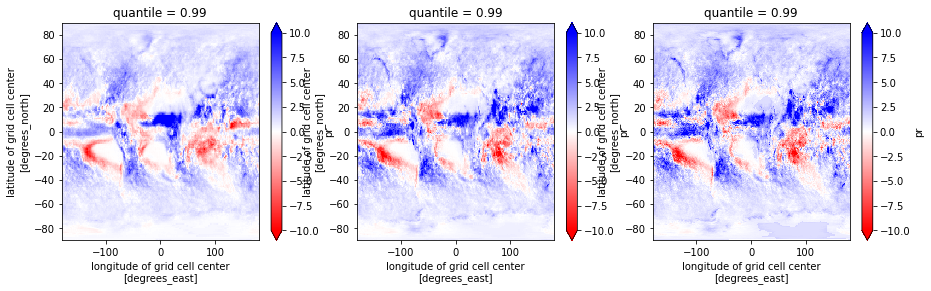

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
vmax = 10
vmin = -10
cmap = 'bwr_r'
q = 0.99
trend_cmip6_comp.sel(quantile=q).plot(ax=axes[0], vmin=vmin, vmax=vmax, cmap=cmap)
trend_bc_comp.sel(quantile=q).plot(ax=axes[1], vmin=vmin, vmax=vmax,cmap=cmap)
trend_ds_comp.sel(quantile=q).plot(ax=axes[2], vmin=vmin, vmax=vmax,cmap=cmap)

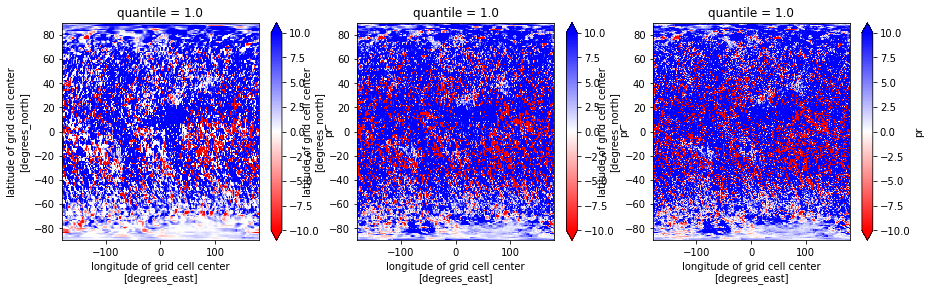

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
vmax = 10
vmin = -10
cmap = 'bwr_r'
q = 1
trend_cmip6_comp.sel(quantile=q).plot(ax=axes[0], vmin=vmin, vmax=vmax, cmap=cmap)
trend_bc_comp.sel(quantile=q).plot(ax=axes[1], vmin=vmin, vmax=vmax,cmap=cmap)
trend_ds_comp.sel(quantile=q).plot(ax=axes[2], vmin=vmin, vmax=vmax,cmap=cmap)

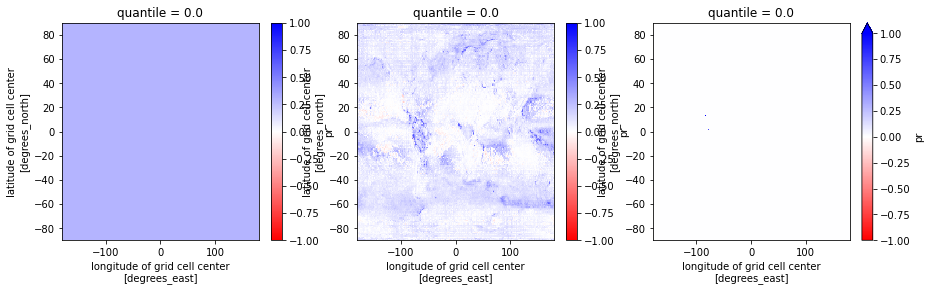

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
vmax = 1
vmin = -1
cmap = 'bwr_r'
q = 0
trend_cmip6_comp.sel(quantile=q).plot(ax=axes[0], vmin=vmin, vmax=vmax, cmap=cmap)
trend_bc_comp.sel(quantile=q).plot(ax=axes[1], vmin=vmin, vmax=vmax,cmap=cmap)
trend_ds_comp.sel(quantile=q).plot(ax=axes[2], vmin=vmin, vmax=vmax,cmap=cmap)

### now look at dry day count in reanalysis/raw model data/downscaled data ### 

In [49]:
ref_dry_days = pr_ref['pr'].sel(time=slice("1995", "2014")).where(pr_ref['pr'].sel(time=slice("1995", "2014")) <= 1).count('time')
cmip6_dry_days = cmip6_hist['pr'].sel(time=slice("1995", "2014")).where(cmip6_hist['pr'].sel(time=slice("1995", "2014")) <= 1).count('time')
bc_dry_days = bc_hist['pr'].sel(time=slice("1995", "2014")).where(bc_hist['pr'].sel(time=slice("1995", "2014")) <= 1).count('time')
ds_dry_days = ds_hist['pr'].sel(time=slice("1995", "2014")).where(ds_hist['pr'].sel(time=slice("1995", "2014")) <= 1).count('time')

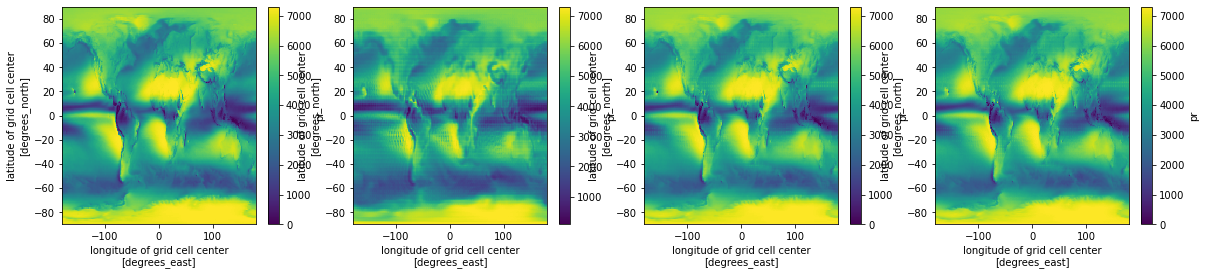

In [50]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

ref_dry_days.plot(ax=axes[0])
cmip6_dry_days.plot(ax=axes[1])
bc_dry_days.plot(ax=axes[2])
ds_dry_days.plot(ax=axes[3])

In [51]:
cmip6_ssp370_dry_days = cmip6_ssp370['pr'].sel(time=slice("2080", "2100")).where(cmip6_ssp370['pr'].sel(time=slice("2080", "2100")) <= 1).count('time')

bc_ssp370_dry_days = bc_ssp370['pr'].sel(time=slice("2080", "2100")).where(bc_ssp370['pr'].sel(time=slice("2080", "2100")) <= 1).count('time')

ds_ssp370_dry_days = ds_ssp370['pr'].sel(time=slice("2080", "2100")).where(ds_ssp370['pr'].sel(time=slice("2080", "2100")) <= 1).count('time')

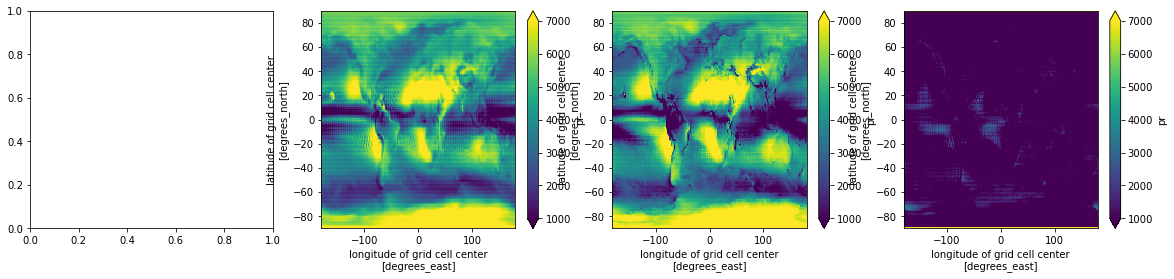

In [52]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

vmin = 1000
vmax = 7000
cmip6_ssp370_dry_days.plot(ax=axes[1], vmin=vmin, vmax=vmax)
bc_ssp370_dry_days.plot(ax=axes[2], vmin=vmin, vmax=vmax)
ds_ssp370_dry_days.plot(ax=axes[3], vmin=vmin, vmax=vmax)

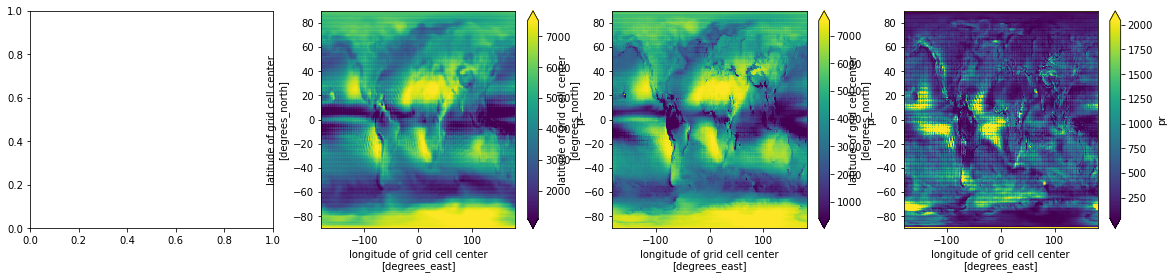

In [57]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

vmin = 1000
vmax = 7000
cmip6_ssp370_dry_days.plot(ax=axes[1], robust=True)
bc_ssp370_dry_days.plot(ax=axes[2], robust=True)
ds_ssp370_dry_days.plot(ax=axes[3], robust=True)